In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('C:/Users/Abhishek/Downloads/Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [8]:
x = data.iloc[:,[3,4]].values

In [9]:
x.shape

(200, 2)

In [10]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Standardization

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

In [13]:
x = sc.fit_transform(x)

In [14]:
x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

# KMeans Clusterings

In [15]:
from sklearn.cluster import KMeans

In [16]:
inertia = []
for i in range(1,11):
    model = KMeans(n_clusters=i, init='k-means++',random_state=0)
    model.fit(x)
    inertia.append(model.inertia_)

In [17]:
inertia

[399.99999999999994,
 269.01679374906655,
 157.70400815035939,
 108.92131661364358,
 65.56840815571681,
 55.057348270385965,
 44.91118554999014,
 37.1817578268213,
 32.37525368158289,
 29.076176851244288]

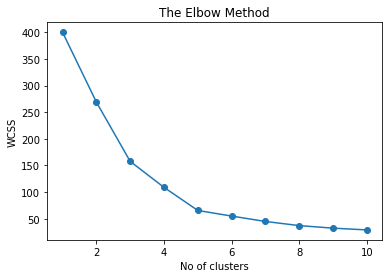

In [18]:
plt.plot(range(1,11),inertia,'o-')
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
model = KMeans(n_clusters=5,init='k-means++',random_state=0)

In [20]:
model.fit(x)

KMeans(n_clusters=5, random_state=0)

In [21]:
y_cluster = model.predict(x)

In [22]:
y_cluster

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [23]:
x1 = x[:,0]
x2 = x[:,1]

In [24]:
x1

array([-1.73899919, -1.73899919, -1.70082976, -1.70082976, -1.66266033,
       -1.66266033, -1.62449091, -1.62449091, -1.58632148, -1.58632148,
       -1.58632148, -1.58632148, -1.54815205, -1.54815205, -1.54815205,
       -1.54815205, -1.50998262, -1.50998262, -1.43364376, -1.43364376,
       -1.39547433, -1.39547433, -1.3573049 , -1.3573049 , -1.24279661,
       -1.24279661, -1.24279661, -1.24279661, -1.20462718, -1.20462718,
       -1.16645776, -1.16645776, -1.05194947, -1.05194947, -1.05194947,
       -1.05194947, -1.01378004, -1.01378004, -0.89927175, -0.89927175,
       -0.86110232, -0.86110232, -0.82293289, -0.82293289, -0.82293289,
       -0.82293289, -0.78476346, -0.78476346, -0.78476346, -0.78476346,
       -0.70842461, -0.70842461, -0.67025518, -0.67025518, -0.67025518,
       -0.67025518, -0.63208575, -0.63208575, -0.55574689, -0.55574689,
       -0.55574689, -0.55574689, -0.51757746, -0.51757746, -0.47940803,
       -0.47940803, -0.47940803, -0.47940803, -0.47940803, -0.47

In [25]:
x2

array([-0.43480148,  1.19570407, -1.71591298,  1.04041783, -0.39597992,
        1.00159627, -1.71591298,  1.70038436, -1.83237767,  0.84631002,
       -1.4053405 ,  1.89449216, -1.36651894,  1.04041783, -1.44416206,
        1.11806095, -0.59008772,  0.61338066, -0.82301709,  1.8556706 ,
       -0.59008772,  0.88513158, -1.75473454,  0.88513158, -1.4053405 ,
        1.23452563, -0.7065524 ,  0.41927286, -0.74537397,  1.42863343,
       -1.7935561 ,  0.88513158, -1.7935561 ,  1.62274124, -1.4053405 ,
        1.19570407, -1.28887582,  0.88513158, -0.93948177,  0.96277471,
       -0.59008772,  1.62274124, -0.55126616,  0.41927286, -0.86183865,
        0.5745591 ,  0.18634349, -0.12422899, -0.3183368 , -0.3183368 ,
        0.06987881,  0.38045129,  0.14752193,  0.38045129, -0.20187212,
       -0.35715836, -0.00776431, -0.16305055,  0.03105725, -0.16305055,
        0.22516505,  0.18634349,  0.06987881,  0.34162973,  0.03105725,
        0.34162973, -0.00776431, -0.08540743,  0.34162973, -0.12

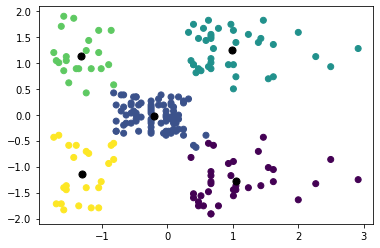

In [41]:
plt.scatter(x1,x2,c = y_cluster)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid')
plt.show()

# Hierarchical Clustring

In [27]:
import scipy.cluster.hierarchy as sch

<function matplotlib.pyplot.show(close=None, block=None)>

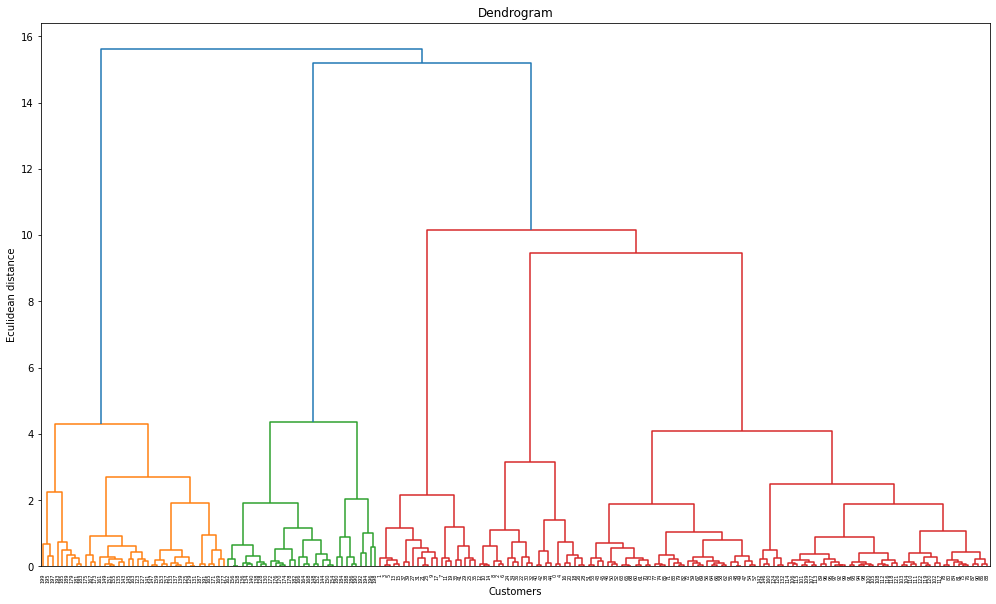

In [28]:
plt.figure(figsize=(17,10))
sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Eculidean distance')
plt.show

# Agglomerative Clustering

In [29]:
from sklearn.cluster import AgglomerativeClustering

In [30]:
hc = AgglomerativeClustering(n_clusters=5)

In [31]:
y_hc = hc.fit_predict(x)

In [32]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

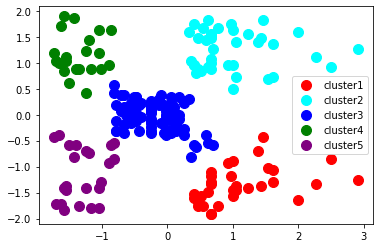

In [33]:
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], c='red', s=100, label='cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], c='cyan', s=100, label='cluster2')
plt.scatter(x[y_hc==2,0], x[y_hc==2,1], c='blue', s=100, label='cluster3')
plt.scatter(x[y_hc==3,0], x[y_hc==3,1], c='green', s=100, label='cluster4')
plt.scatter(x[y_hc==4,0], x[y_hc==4,1], c='purple', s=100, label='cluster5')
plt.legend()
plt.show()